# Grocery store simulation

# Average grocery cost
According to: https://www.foxbusiness.com/lifestyle/what-is-the-average-grocery-bill-for-one-person
The average grocery monthly bill is between 165 and 345 the average person going twice a month
According to:https://www.indeed.com/cmp/Yankee-Candle-Company/faq/how-many-customers-does-a-store-average-daily-monthly-or-annually?quid=1ap84cf3eas34fe5#:~:text=On%20an%20average%20day%20there,around%201%2C000%20customers%20a%20day.
 even small stores get 2000 visitors a day
 
2000 * 30 days = 60000 customers

In [3]:
import numpy as np
import pandas as pd
# Mean is 127 and lets say the standard deviation is 80 with 6000 samples and 1 column
df2 = pd.DataFrame(np.random.normal(127.5,80,size=(60000, 1)), columns=list('P'))
df2.rename({'P': 'purchases'}, axis=1, inplace=True)
df2['purchases'] = df2.abs() # Get absolute values only 
df2.head()


,purchases
0,85.874360
1,100.585915
2,2.395237
3,270.410630
4,74.497458


In [4]:
df2.shape # Still have 1000 rows....

(60000, 1)

# Visualization of purchases distribution

Text(0, 0.5, 'Frequency')

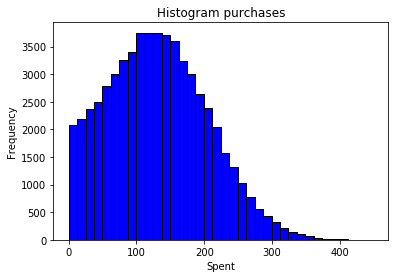

In [17]:
# matplotlib histogram
import matplotlib.pyplot as plt
plt.hist(df2['purchases'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
# Add labels
plt.title('Histogram purchases')
plt.xlabel('Spent')
plt.ylabel('Frequency')

# Profit margins
Lets make a column of profit margins for each purchase of the customers in the store... 
According to:
https://smallbusiness.chron.com/profit-margin-supermarket-22467.html
Grocery stores make small profit margins 1-3%

In [19]:
# Lets make a new column that is just the the new column multiplied by 2%
# Assuming that the basket of items is a normal gaussian distribution of mean 2 
df2["margin"] = .02 * df2["purchases"]
df2.head()

,purchases,margin
0,85.874360,1.717487
1,100.585915,2.011718
2,2.395237,0.047905
3,270.410630,5.408213
4,74.497458,1.489949


Text(0, 0.5, 'Frequency')

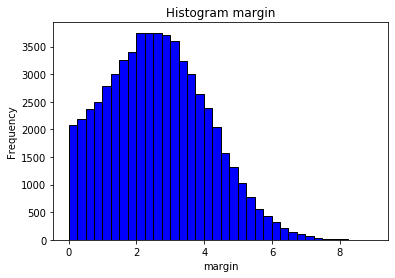

In [20]:
# matplotlib histogram of margin
plt.hist(df2['margin'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
# Add labels
plt.title('Histogram margin')
plt.xlabel('margin')
plt.ylabel('Frequency')

In [21]:
# with 6000 customers and profit margin of 2% the total profit for a month is 2662
profit = df2['margin'].sum()  
profit #  $15752 dollars a month 

157438.03623672112

# Costs to purchase average items 

According to : https://www.fivestarhomefoods.com/blog/grocery-shopping-facts#:~:text=2.,over%2039%2C500%20items%20on%20average! 
The average amount of items at grocery store is about 40000  
We will say the average cost of an item is 10 dollars for simplicity

According to: https://www.dumpsters.com/blog/grocery-store-food-waste-statistics#:~:text=Stat%20%231%3A%20Grocery%20Stores%20Cause,Percent%20of%20U.S.%20Food%20Waste*
the average percent of waste at a grocery store is 10%

In [45]:
# Make a normal distribution of items with mean 4 and standard deviation of 1 dollar for 40000 items name it shevele stock
df3 = pd.DataFrame(np.random.normal(10,1,size=(40000, 1)), columns=list('P'))
df3.rename({'P': 'shelve_stock'}, axis=1, inplace=True)
df3['shelve_stock'] = df3.abs() # Get absolute values only 
df3.head()

,shelve_stock
0,10.161538
1,7.919090
2,10.685094
3,9.019030
4,9.934747


# Calculate the value of inventory

In [54]:
Total1 = df3['shelve_stock'].sum()  # This is the total value of the inventory
print(Total1) #benift
print(Total1*.10) # loss
print(Total1 - 39994)

399938.3430506262
39993.83430506263
359944.3430506262


# Calculate cost of inventory 1-profit margin at 3 % profit margin

In [47]:
# This is the cost of inventory
df3['inv_cost'] = .97 * df3["shelve_stock"]
df3.head()

,shelve_stock,inv_cost
0,10.161538,9.856692
1,7.919090,7.681518
2,10.685094,10.364541
3,9.019030,8.748459
4,9.934747,9.636705


# Profit margin sum

In [61]:
# Total cost of stocking shelves.
Total = df3['inv_cost'].sum() # This is the total value of the inventory
print(Total1*.90) # total margin accountinf for 10% loss

359944.5087455636
